In [1]:
# Linear algebra and data manipulation imports
import pandas as pd

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('dark_background')
%matplotlib inline

##### Import data

In [3]:
DATA_DIR='../data/'

# Import train data and test data
train = pd.read_csv(DATA_DIR + 'raw_titanic_train.csv')
test = pd.read_csv(DATA_DIR + 'raw_titanic_test.csv')

### EDA
###### General Outline of EDA
1. Summarize representation and objective
2. High level data preview (features, targets, train and test sets)
3. Visualize any null values and duplicate entries
4. Visual EDA

Note that *Survived*, *Pclass*, *Sex* and *Embarked* are categorical variables here. So we need dummy variables to represent each category using one-hot encoding and avoiding full correlation between the correlations (a category is omitted to prevent full correlation)


###### 1a. Representation

*Survived*: perfect, 1 represents survived and 0 represents not-survived

*PClass*: 1 represents 'First Class', 2 represents 'Second Class' and 3 represents 'Third Class'

*Sex*: Male and female

*Embarked*: C represents 'Cherbourg', S represents 'Southampton' and Q represents 'Queenstown'


###### 1b. Objective
Predict survival (survived or not) of passengers on rms titanic

###### 2. High level data preview (features, targets, train and test sets)

**Train data**

In [4]:
# Check info of train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the *Non-Null Count* column above, see that the **Age** feature has missing values (177 to be exact), **Embarked**
has 2 missing values and **Cabin** has an astounding 687 missing values.

In [5]:
# Check first 10 rows of train data set
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# Check shape of train dataset
train.shape


(891, 12)

From the table below, the columns with reasonable/complete statistic (non-categorical continuous valued features)
are **Age** and **Fare**. We can see from the train data that the average **Age** of people onboard the
titanic is 29.699118, meaning there were more young people than old people onboard.
The youngest person was 5months and the oldest was 80years of age.

In [7]:
# Show description of train dataset for numerical columns
# (may include some categorical columns as well)
train.describe()

# Note that 'Survived' and 'Pclass' shown are categorical variables and not numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Test data**

In [8]:
# Check info of test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


For the test dataset, missing values are noticed for some features as shown above in the *Non-Null Count* column above,
see that the **Age** feature has 86 missing values, **Cabin** has 327 missing values, and **Fare** has 1 missing value.
Notice that in the train dataset **Fare** has no missing value, we would have to handle imputation
for **Fare** in test set specially.

In [9]:
# Check first 10 rows of test data set
test.head(10)

# Has same columns as the train data except the label, 'Survived' is out

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [10]:
# Check the dimensions (row count) of the test data
test.shape

(418, 11)

The test dataset is different from the train dataset, as it should be.
Here, as shown in the table below. From the **Age** column, the average age of people onboard the
titanic is 30.272590. The youngest person was 2months and the oldest was 76years of age.

In [11]:
# Show the description of the test data, excluding non-numeric columns
test.describe()

# Note that Pclass' shown is a categorical variable

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


###### 3. Visualize any null values and duplicate entries
**Visualize null values in train data**

<AxesSubplot:>

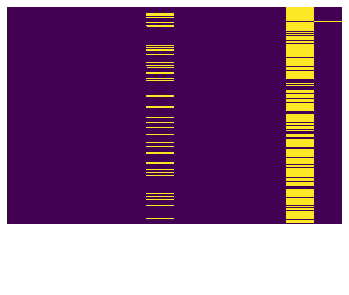

In [12]:
# Visualize null values in train data

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Visualize null values in test data**

<AxesSubplot:>

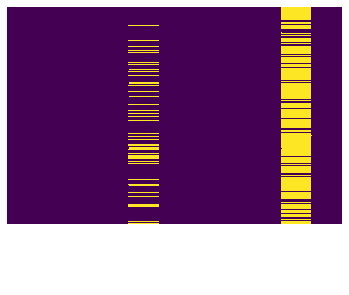

In [13]:
# Visualize null values in test data

sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###### 4. Visual EDA
Visualization of label categories (survived = 1, not survived = 0) in train set

/Users/ayomide.bakare/opt/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Survived and Not Survived')

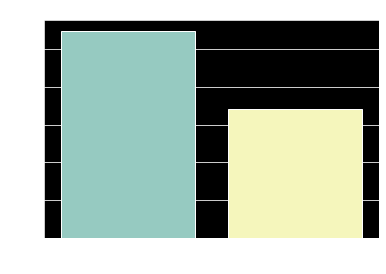

In [14]:
# Visualizing classification label 'Survived'

sns.countplot(train['Survived'])
plt.title('Count of Survived and Not Survived')

Text(0.5, 1.0, 'Count of Survived distributed against Sex')

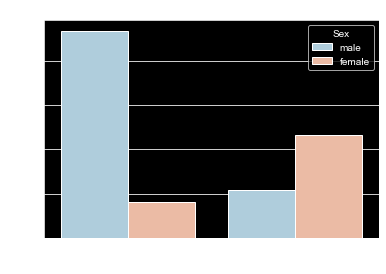

In [15]:
# Visualizing classification label 'Survived' for 'Sex' feature

sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')
plt.title('Count of Survived distributed against Sex')

Text(0.5, 1.0, 'Count of Survived distributed against Pclass')

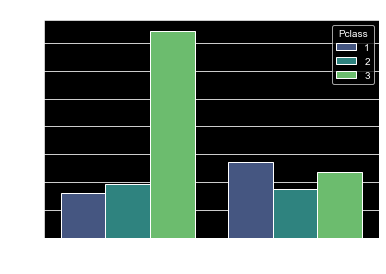

In [16]:
# Visualizing classification label 'Survived' for 'Pclass' feature

sns.countplot(x='Survived',data=train,hue='Pclass',palette='viridis')
plt.title('Count of Survived distributed against Pclass')

Text(0.5, 1.0, 'Age distribution plot')

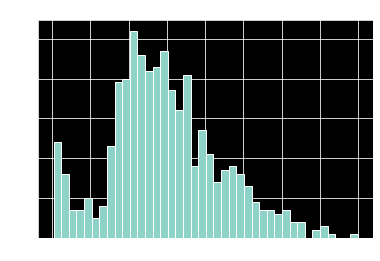

In [17]:
train['Age'].dropna().plot.hist(bins=40)
plt.title('Age distribution plot')

Text(0.5, 1.0, 'Count of SibSp')

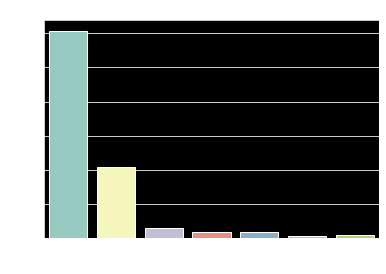

In [18]:
sns.countplot(x='SibSp',data=train)
plt.title('Count of SibSp')

Text(0.5, 1.0, 'Count of Survived distributed against Embarked')

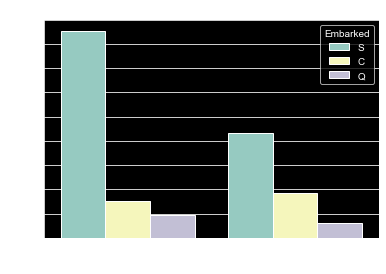

In [19]:
sns.countplot(x='Survived', data=train, hue='Embarked')
plt.title('Count of Survived distributed against Embarked')
# it looks like many passenger embarked from Southampton.
# Nonetheless, this distribution does not clearly show any relevant correlation between embarkation and survival.

/Users/ayomide.bakare/opt/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fare distribution plot')

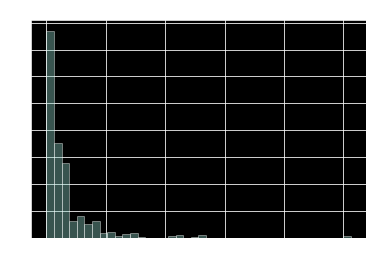

In [20]:
sns.distplot(train['Fare'],kde=False,bins=40)
plt.title('Fare distribution plot')

Text(0.5, 1.0, 'Boxplot of Pclass against Age')

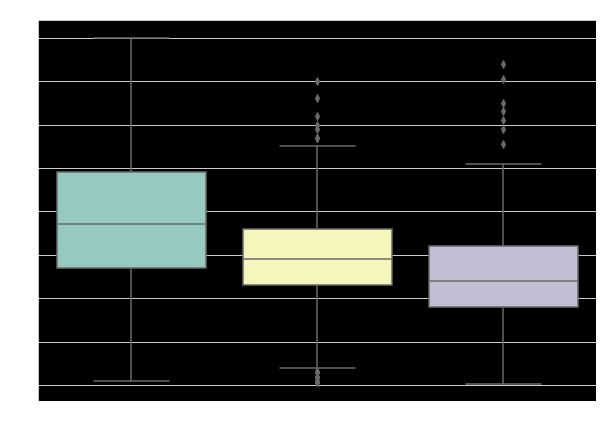

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)
plt.title('Boxplot of Pclass against Age')

### Imputation
###### General Outline of Imputation
1. Impute missing values in **Age** based on mean of age grouped by **Pclass**
2. Engineer **Title** feature from **Name** feature
3. Drop **Cabin** feature
4. Impute missing values in **Embarked** with most frequent embarkation
5. Impute missing value in **Fare** feature

NB: Imputation done separately for train and test datasets

In [22]:
import re

# feature engineering on Name feature. It looks like the user title could have an effect on Survival
def eng_name(data):
    """
    helper method to engineer new Title feature from Name feature
    :param data: train or test data
    :return: None
    """
    data['Title'] = data['Name'].apply(lambda name: re.split('[,.]+ *', name)[1])

def impute_age(data):
    """
    helper method to perform imputation on Age
    :param data: train or test data
    :return: None
    """
    Pclass1Mean = data['Age'][data['Pclass'] == 1].mean()
    Pclass2Mean = data['Age'][data['Pclass'] == 2].mean()
    Pclass3Mean = data['Age'][data['Pclass'] == 3].mean()

    def _impute(cols):
        Age = cols[0]
        Pclass = cols[1]

        if (pd.isnull(Age)):
            if Pclass == 1:
                return Pclass1Mean
            elif Pclass == 2:
                return Pclass2Mean
            else:
                return Pclass3Mean
        else:
            return Age

    data['Age'] = data[['Age', 'Pclass']].apply(_impute,axis=1)

#### Train dataset
###### 1. Impute missing values in **Age** based on mean of age grouped by **Pclass**

In [23]:
# perform imputation on train data
impute_age(train)

Visualize null values after **Age** imputation in train data

<AxesSubplot:>

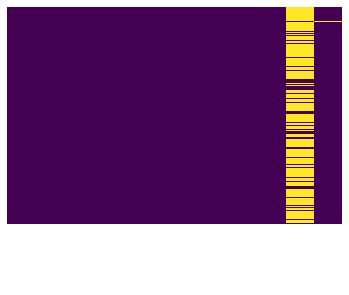

In [24]:
# Visualize null values in train data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###### 2. Engineer Title feature from Name feature

In [25]:
eng_name(train)
train.head()[['PassengerId', 'Name', 'Title']]

,PassengerId,Name,Title
0,1,"Braund, Mr. Owen Harris",Mr
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,3,"Heikkinen, Miss. Laina",Miss
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,5,"Allen, Mr. William Henry",Mr


###### 3. Drop **Cabin** feature

In [26]:
# Cabin has to many missing values, could make it categorical as Cabin Available vs Cabin Inavailable
train.drop('Cabin',axis=1,inplace=True)

###### 4. Impute missing values in **Embarked** with most frequent embarkation

In [27]:
# Impute (one) missing value for Fare column. The culprit is a male and third class passenger
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

Visualize null values after dropping **Cabin** feature, **Title** feature engr, and imputing **Embarked** feature
in train data

<AxesSubplot:>

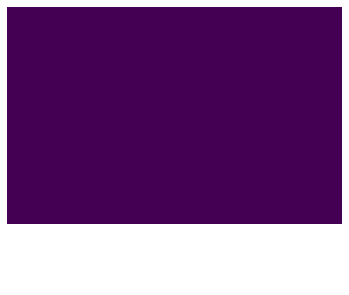

In [28]:
# Visualize null values in train data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

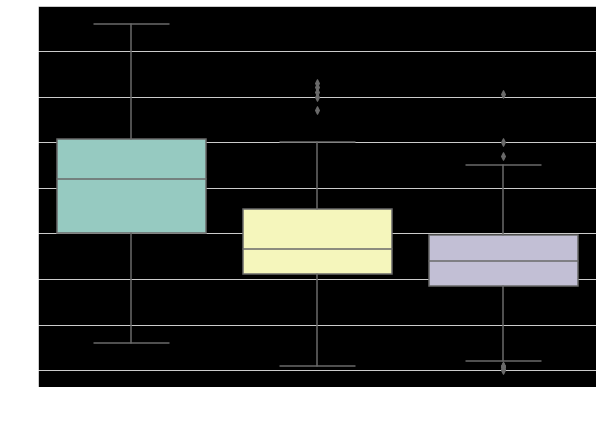

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=test)

#### Test dataset
###### 1. Impute missing values in **Age** based on mean of age grouped by **Pclass**

In [30]:
# Impute missing age values in test dataset
impute_age(test)


###### 2. Engineer Title feature from Name feature

In [31]:
eng_name(test)
test.head()[['PassengerId', 'Name', 'Title']]


,PassengerId,Name,Title
0,892,"Kelly, Mr. James",Mr
1,893,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,894,"Myles, Mr. Thomas Francis",Mr
3,895,"Wirz, Mr. Albert",Mr
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs


###### 3. Drop **Cabin** feature

In [32]:
# Cabin has to many missing values, could make it categorical as Cabin Available vs Cabin Inavailable
test.drop('Cabin',axis=1,inplace=True)


###### 5. Impute missing value in **Fare** feature

In [33]:
# Impute (one) missing value for Fare column. The culprit is a male and third class passenger
test['Fare'] = test['Fare'].fillna(test['Fare'][(test['Pclass'] == 3) & (test['Sex'] == 'male')].mean())

Visualize null values after dropping **Cabin** feature, imputing **Age**, imputing **Fare**
 in test data

<AxesSubplot:>

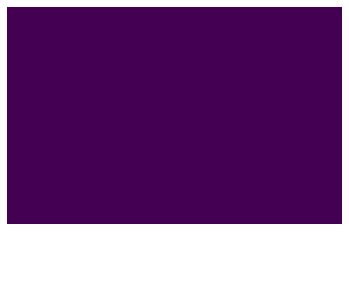

In [34]:
# Visualize null values in test data¡
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
# save clean test data to csv file
train.to_csv(DATA_DIR + 'clean_titanic_train.csv',index=False)
test.to_csv(DATA_DIR + 'clean_titanic_test.csv',index=False)
